In [1]:
#ロジスティクス回帰モデル（タイタニック）
z <- data.frame(Titanic)
summary(z)
# Freqの数の行を生成（整形）
titanic.data <- data.frame(
  Class=rep(z$Class, z$Freq),
  Sex=rep(z$Sex, z$Freq),
  Age=rep(z$Age, z$Freq),
  Survived=rep(z$Survived, z$Freq)
)
  
# View(titanic.data)
head(titanic.data, n = 5)

  Class       Sex        Age     Survived      Freq       
 1st :8   Male  :16   Child:16   No :16   Min.   :  0.00  
 2nd :8   Female:16   Adult:16   Yes:16   1st Qu.:  0.75  
 3rd :8                                   Median : 13.50  
 Crew:8                                   Mean   : 68.78  
                                          3rd Qu.: 77.00  
                                          Max.   :670.00  

,Class,Sex,Age,Survived
,<fct>,<fct>,<fct>,<fct>
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
5,3rd,Male,Child,No


In [2]:
#モデル構築
titanic.logit <- glm(Survived~.,data = titanic.data, family = binomial)
summary(titanic.logit)


Call:
glm(formula = Survived ~ ., family = binomial, data = titanic.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0812  -0.7149  -0.6656   0.6858   2.1278  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   0.6853     0.2730   2.510   0.0121 *  
Class2nd     -1.0181     0.1960  -5.194 2.05e-07 ***
Class3rd     -1.7778     0.1716 -10.362  < 2e-16 ***
ClassCrew    -0.8577     0.1573  -5.451 5.00e-08 ***
SexFemale     2.4201     0.1404  17.236  < 2e-16 ***
AgeAdult     -1.0615     0.2440  -4.350 1.36e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2769.5  on 2200  degrees of freedom
Residual deviance: 2210.1  on 2195  degrees of freedom
AIC: 2222.1

Number of Fisher Scoring iterations: 4


In [3]:
#オッズ比の算出
#パッケージ読み込み
install.packages("devtools")
library(devtools)
install_github("cran/epicalc")
library(epicalc)

logistic.display(titanic.logit, simplified = T)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: usethis




foreign (NA -> 0.8-80) [CRAN]


Installing 1 packages: foreign

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



✔  checking for file ‘/tmp/RtmpWPKLbC/remotes24b25627cac/cran-epicalc-cf8e998/DESCRIPTION’
─  preparing ‘epicalc’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘epicalc_2.15.1.0.tar.gz’
   


Loading required package: foreign

Loading required package: survival

Loading required package: MASS

Loading required package: nnet



,OR,lower95ci,upper95ci,Pr(>|Z|)
Class2nd,0.3612825,0.2460447,0.5304933,2.053331e-07
Class3rd,0.1690159,0.1207510,0.2365727,3.691891e-25
ClassCrew,0.4241466,0.3115940,0.5773549,5.004592e-08
SexFemale,11.2465380,8.5408719,14.8093331,1.431830e-66
AgeAdult,0.3459219,0.2144193,0.5580746,1.360490e-05


also installing the dependencies ‘libcoin’, ‘mvtnorm’, ‘Formula’, ‘inum’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm



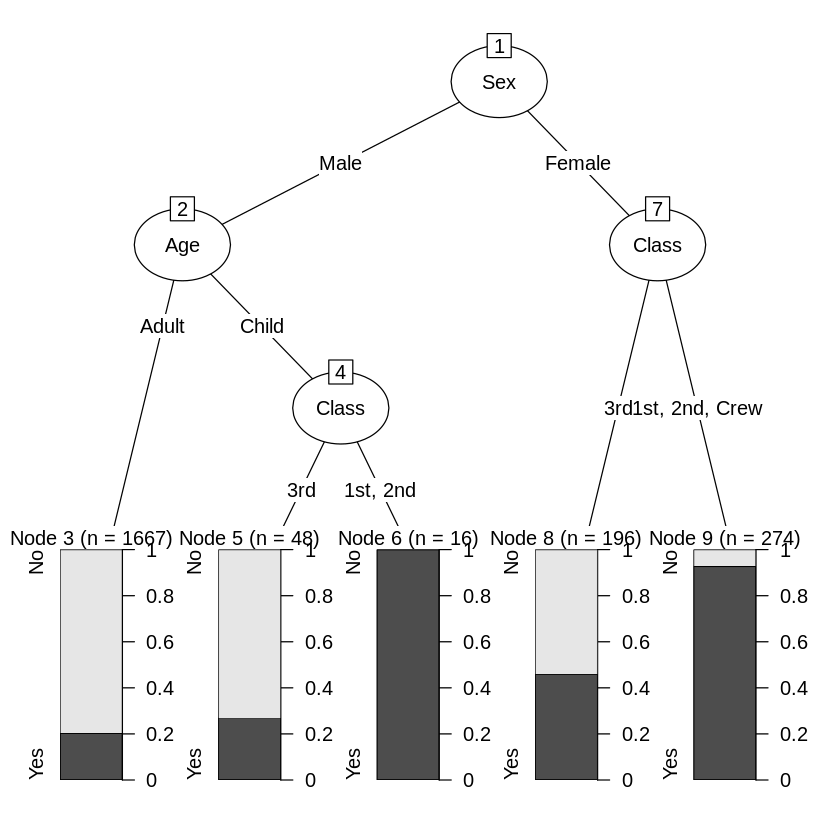

In [4]:
#分類木
install.packages("partykit")
library(partykit)
library(rpart)

titanic.rp <- rpart(Survived~.,data = titanic.data)
plot(as.party(titanic.rp), tp_args = T)

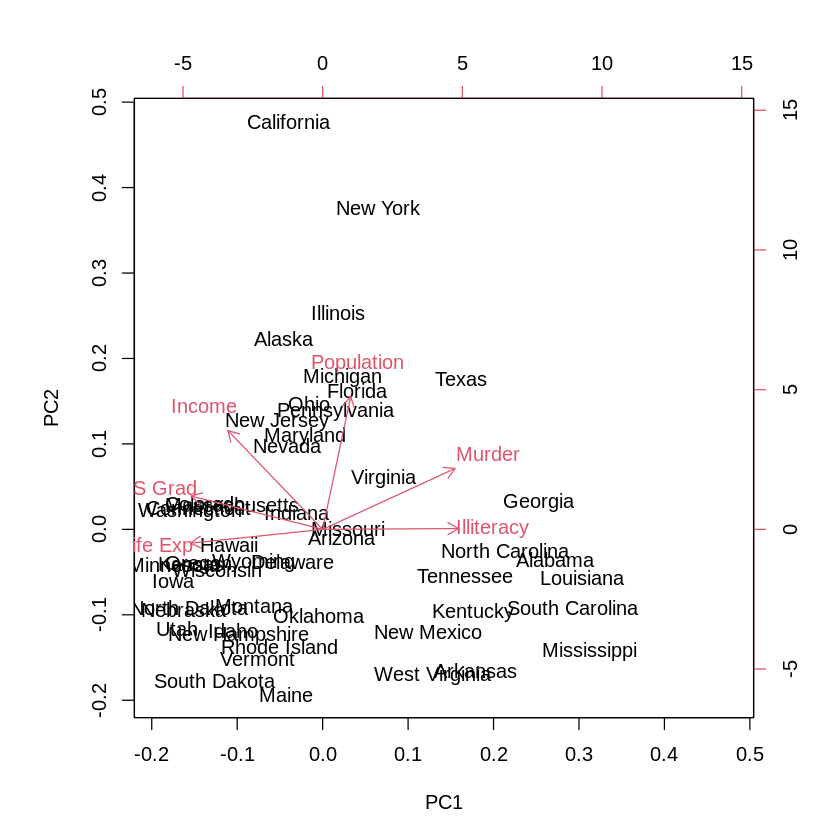

In [5]:
#主成分分析
state.pca <- prcomp(state.x77[,1:6], scale=T)
biplot(state.pca)


Attaching package: ‘ggplot2’


The following object is masked from ‘package:epicalc’:

    alpha




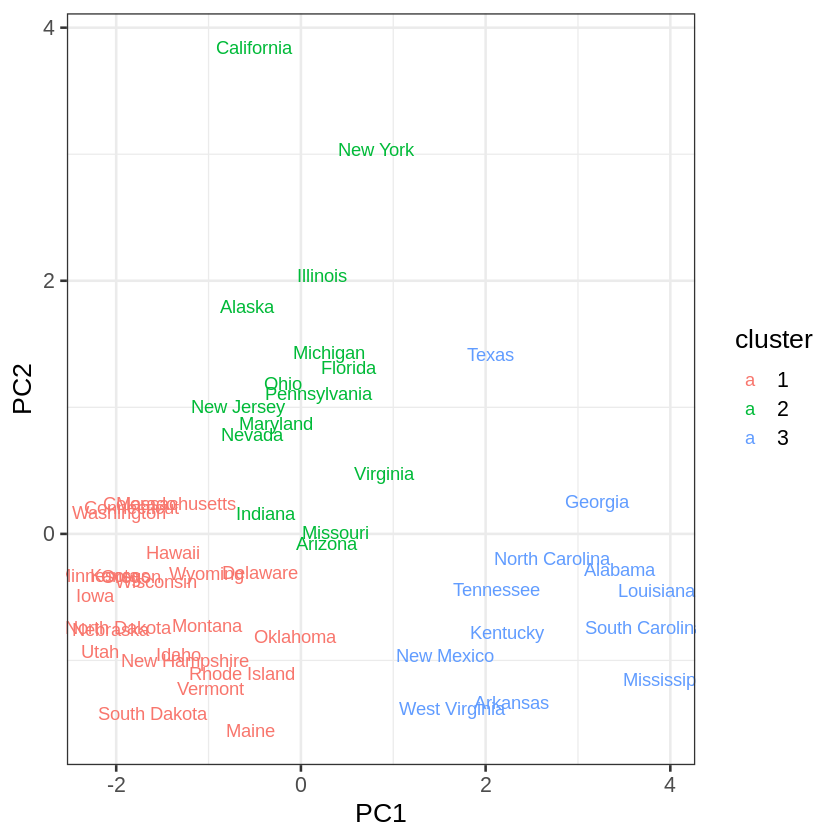

In [6]:
library(ggplot2)
#クラスタリング（k-means）
state.km <- kmeans(scale(state.x77[,1:6]),3)
state.pca.df <- data.frame(state.pca$x)
state.pca.df$name <- rownames(state.pca.df)
state.pca.df$cluster <- as.factor(state.km$cluster)

ggplot(state.pca.df, aes(x=PC1,y=PC2,label=name,col=cluster)) +
  geom_text() +
  theme_bw(16)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



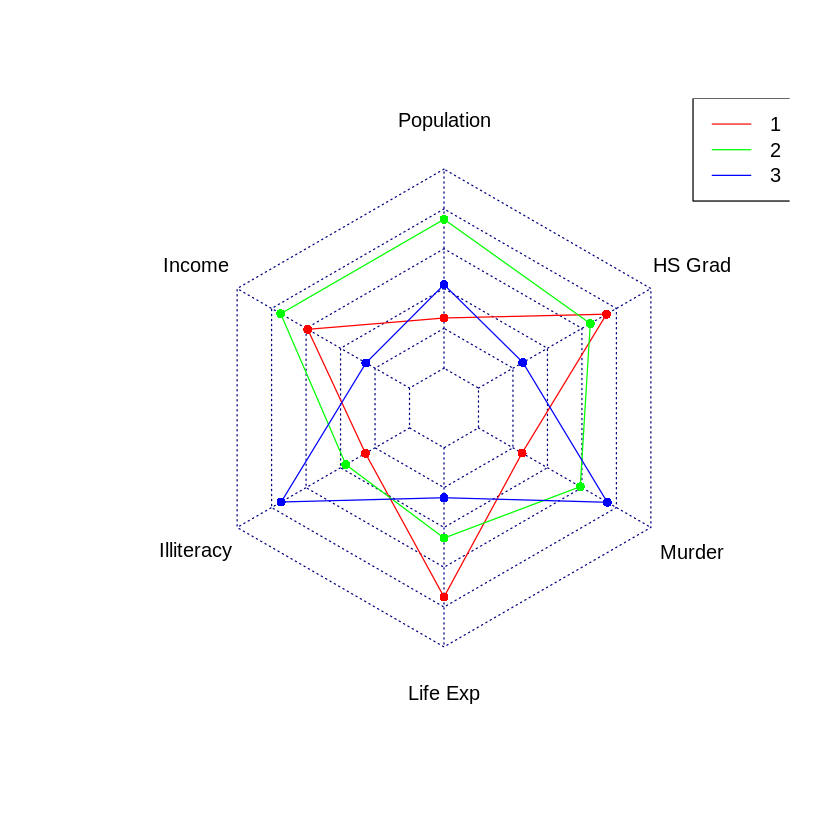

In [7]:
#レーダーチャート
install.packages("fmsb")
library(fmsb)

# データを整形（レーダーチャート用）
df <- as.data.frame(scale(state.km$centers))
dfmax <- apply(df, 2, max) +1
dfmin <- apply(df, 2, min) -1
df <- rbind(dfmax, dfmin, df)
# 描画
radarchart(df,seg=5,plty=1,pcol=rainbow(3))
legend("topright",legend=1:3,col=rainbow(3),lty=1)